# <font color = 'teal'> Import Libraries </font>

In [102]:
import numpy as np
import math
import pandas as pd
pd.set_option('display.max_columns', 20)
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt

# <font color = 'teal'> Read and Inspect Data </font>

In [2]:
source = pd.ExcelFile(r"C:\Users\mcondon\Documents\GitHub\Jupyter-lessons\Cohort\Online Retail.xlsx")

In [85]:
online = pd.read_excel(source, 'Online Retail')

In [86]:
online.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [87]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [88]:
#Dropping nulls
online = online.dropna().reset_index(drop=True)

In [89]:
#Sorting to make it easier to spot check
online = online.sort_values('CustomerID').reset_index(drop=True)

### Assign daily acquisition cohort (CohortDay)##

In [90]:
# Define a function that will parse the date
def get_day(x): 
    return dt.datetime(x.year, x.month, x.day) 

# Create InvoiceDay column
online['InvoiceDay'] = online['InvoiceDate'].apply(get_day) 

# Group by CustomerID and select the InvoiceDay value
grouping = online.groupby('CustomerID')['InvoiceDay'] 

# Assign a minimum InvoiceDay value to the dataset
online['CohortDay'] = grouping.transform('min').astype('datetime64[ns]')

# View the top 5 rows
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay
0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01-18,2011-01-18
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011-01-18,2011-01-18
2,562032,21578,WOODLAND DESIGN COTTON TOTE BAG,6,2011-08-02 08:48:00,2.25,12347.0,Iceland,2011-08-02,2010-12-07
3,542237,47559B,TEA TIME OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland,2011-01-26,2010-12-07
4,542237,21154,RED RETROSPOT OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland,2011-01-26,2010-12-07


### Calculate time offset in days - part 1##

In [91]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [92]:
# Get the integers for date parts from the `InvoiceDay` column
invoice_year, invoice_month, invoice_day = get_date_int(online, 'InvoiceDay')

# Get the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, cohort_day = get_date_int(online, 'CohortDay')

### Calculate time offset in days - part 2 (ChortIndex)

In [93]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Calculate difference in days
days_diff = invoice_day - cohort_day

# Extract the difference in days from all previous values
online['CohortIndex'] = years_diff * 365 + months_diff * 30 + days_diff + 1
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay,CohortIndex
0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01-18,2011-01-18,1
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011-01-18,2011-01-18,1
2,562032,21578,WOODLAND DESIGN COTTON TOTE BAG,6,2011-08-02 08:48:00,2.25,12347.0,Iceland,2011-08-02,2010-12-07,241
3,542237,47559B,TEA TIME OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland,2011-01-26,2010-12-07,55
4,542237,21154,RED RETROSPOT OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland,2011-01-26,2010-12-07,55


In [94]:
# Converting CohortIndex to months from days
online['CohortIndex'] = np.ceil(np.divide(online.CohortIndex,30)).astype('int')

# <font color = 'teal'> Cohort Metrics </font>

### Calculate retention from scratch

In [95]:
#Adding CohortMonth from CohortDay in dt format
online['CohortMonth'] =  online.CohortDay + pd.offsets.MonthBegin(1)

In [96]:
grouping = online.groupby(['CohortMonth', 'CohortIndex'])

In [97]:
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

In [100]:
# Count the number of unique values per customer ID
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

# Create a pivot 
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = (cohort_counts.divide(cohort_sizes, axis=0) * 100).round(2)
retention.head()

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2011-01-01,100.0,38.29,34.49,38.50,36.29,39.03,37.03,35.44,34.92,38.29,40.61,50.74,19.73
2011-02-01,100.0,24.70,28.98,30.40,30.17,28.98,25.65,27.55,33.73,35.15,28.50,1.43,NaN
2011-03-01,100.0,23.42,23.95,29.47,20.79,26.84,25.53,27.89,28.95,25.00,0.79,NaN,NaN
2011-04-01,100.0,18.64,25.00,23.18,19.55,22.05,24.32,27.05,21.82,2.50,NaN,NaN,NaN
2011-05-01,100.0,27.42,17.73,22.41,18.39,23.75,24.75,22.74,2.34,NaN,NaN,NaN,NaN


### Calculate average price

In [158]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = online.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the unit price column
cohort_data = grouping['UnitPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_price = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='UnitPrice')
average_price = average_price.round(2)
average_price.head()

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2011-01-01,3.20,3.19,3.23,3.57,2.90,4.99,3.15,3.25,3.45,3.08,3.21,2.85,2.81
2011-02-01,3.50,3.38,7.34,3.12,3.33,2.88,2.77,2.72,5.63,3.00,2.77,2.36,NaN
2011-03-01,3.52,4.78,2.94,3.14,2.97,2.72,3.19,3.00,2.89,3.06,2.54,NaN,NaN
2011-04-01,3.49,3.86,3.32,3.53,3.08,2.79,2.77,2.79,2.66,3.15,NaN,NaN,NaN
2011-05-01,3.42,3.82,3.16,2.86,2.88,2.88,2.72,2.91,2.54,NaN,NaN,NaN,NaN


### Calculate average quantity

In [108]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = online.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the unit price column
cohort_data = grouping['Quantity'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_quantity = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Quantity')
average_quantity = average_quantity.round(1)
average_quantity.head()

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2011-01-01,11.3,14.5,14.1,15.0,14.6,13.3,14.4,17.5,14.8,17.2,16.9,13.0,13.1
2011-02-01,9.8,15.2,11.3,10.7,12.7,15.4,14.2,14.0,11.4,8.5,9.2,12.2,NaN
2011-03-01,10.8,13.9,16.1,11.8,10.4,13.2,13.0,11.2,10.0,13.8,18.8,NaN,NaN
2011-04-01,9.7,11.0,11.8,9.9,13.8,13.9,10.8,13.7,9.3,5.7,NaN,NaN,NaN
2011-05-01,9.8,8.7,11.8,11.3,11.1,8.6,9.3,9.5,5.6,NaN,NaN,NaN,NaN


# <font color = 'teal'>Cohot Analysis Visualization</font>

No handles with labels found to put in legend.


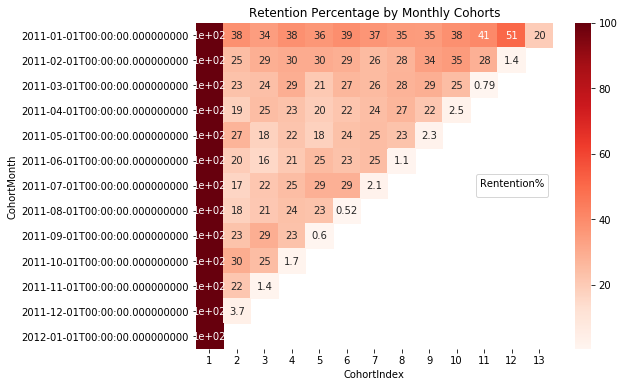

In [157]:
# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(8, 6))

# Add a title
plt.title('Retention Percentage by Monthly Cohorts')

# Create the heatmap
ax = sns.heatmap(data = retention, annot=True, cmap='Reds')
plt.yticks(rotation = 0)
ax.legend(loc = 'right' , title = "Rentention%")
plt.show()

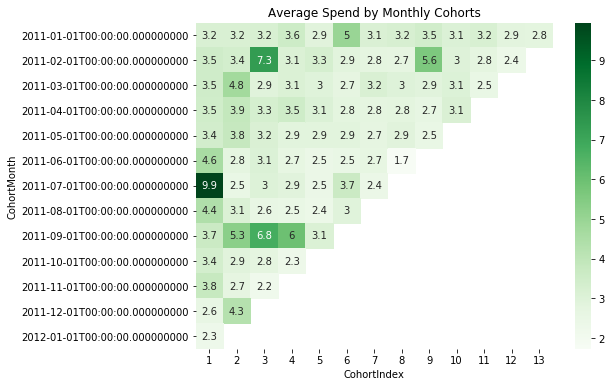

In [159]:
# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(8, 6))

# Add a title
plt.title('Average Spend by Monthly Cohorts')

# Create the heatmap
ax = sns.heatmap(data = average_price, annot=True, cmap='Greens')
plt.yticks(rotation = 0)
plt.show()

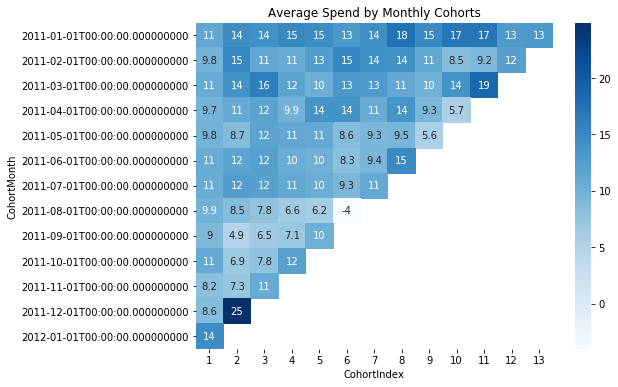

In [139]:
# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(8, 6))

# Add a title
plt.title('Average Quantity by Monthly Cohorts')

# Create the heatmap
ax = sns.heatmap(data = average_quantity, annot=True, cmap='Blues')
plt.yticks(rotation = 0)
plt.show()